# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/yasserh/walmart-dataset

Import the necessary libraries and create your dataframe(s).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("Walmart.csv")

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df_two = pd.read_csv("Features data set.csv")

df_two.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
# Confirming total rows and columns
df.shape

(6435, 8)

In [5]:
df_two.shape

(8190, 12)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [7]:
# Checking to see if there are any nulls

df.info()

df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   

In [10]:
# Trying more coding to detect any missing data
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df_two.isnull().sum()
# As revealed in checkpoint two markdown, cpi and unemployment have missing values

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
# Exploring visual the missing values in specific rows

df.isna()

# Seems like every cell have an entry

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [15]:
df_two.isna()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [38]:
# Filling in all markdown columns with 0 replacing NA and NaN
cols = {"MarkDown1":0, "MarkDown2":0, "MarkDown3":0, "MarkDown4":0, "MarkDown5":0}

clean_markdown = df_two.fillna(value=cols)
print(clean_markdown.to_string())

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday
0         1  05/02/2010        42.31       2.572       0.00       0.00       0.00       0.00       0.00  211.096358         8.106      False
1         1  12/02/2010        38.51       2.548       0.00       0.00       0.00       0.00       0.00  211.242170         8.106       True
2         1  19/02/2010        39.93       2.514       0.00       0.00       0.00       0.00       0.00  211.289143         8.106      False
3         1  26/02/2010        46.63       2.561       0.00       0.00       0.00       0.00       0.00  211.319643         8.106      False
4         1  05/03/2010        46.50       2.625       0.00       0.00       0.00       0.00       0.00  211.350143         8.106      False
5         1  12/03/2010        57.79       2.667       0.00       0.00       0.00       0.00       0.00  211.380643         8.106      False
6         1  

In [39]:
# Confirming markdown columns updated
clean_markdown.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

<Axes: >

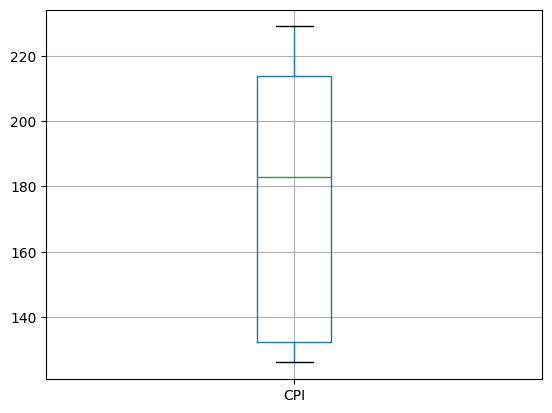

In [26]:
# Visually seeing if cpi and unemployment columns are evenly spread before attempting interpolating
df_two.boxplot(column=['CPI'])

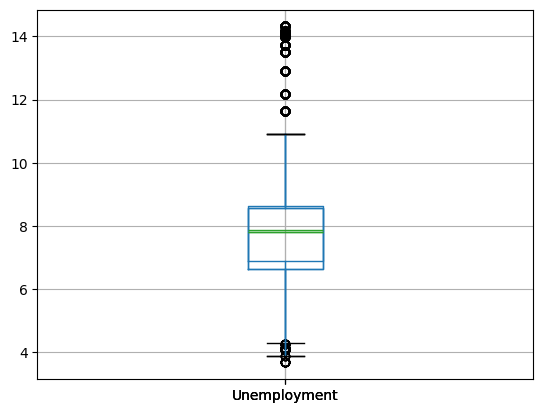

In [29]:
df_two.boxplot(column=['Unemployment'])
plt.show()

In [50]:
# Interpolating cpi and unemployment columns to fill in missing values

clean_features = clean_markdown.interpolate(method= "pad")
print(clean_features.to_string())

/var/folders/k9/zsr43mf97z750z0s8cw9m8s00000gn/T/ipykernel_4581/4172371001.py:3: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_features = clean_markdown.interpolate(method= "pad")


      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday
0         1  05/02/2010        42.31       2.572       0.00       0.00       0.00       0.00       0.00  211.096358         8.106      False
1         1  12/02/2010        38.51       2.548       0.00       0.00       0.00       0.00       0.00  211.242170         8.106       True
2         1  19/02/2010        39.93       2.514       0.00       0.00       0.00       0.00       0.00  211.289143         8.106      False
3         1  26/02/2010        46.63       2.561       0.00       0.00       0.00       0.00       0.00  211.319643         8.106      False
4         1  05/03/2010        46.50       2.625       0.00       0.00       0.00       0.00       0.00  211.350143         8.106      False
5         1  12/03/2010        57.79       2.667       0.00       0.00       0.00       0.00       0.00  211.380643         8.106      False
6         1  

In [42]:
# Confirming cpi and unemployment columns are updated

clean_features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [36]:
# Summary statistics for certain columns to detect any outliers

columns = [[ 'Fuel_Price', 'CPI', 'Unemployment' ]]

for c in columns:
    print(df_two[c].describe())

# The only column that has outliers is the unemployment column. 
# I am considering keeping the outliers in the data.

        Fuel_Price          CPI  Unemployment
count  8190.000000  7605.000000   7605.000000
mean      3.405992   172.460809      7.826821
std       0.431337    39.738346      1.877259
min       2.472000   126.064000      3.684000
25%       3.041000   132.364839      6.634000
50%       3.513000   182.764003      7.806000
75%       3.743000   213.932412      8.567000
max       4.468000   228.976456     14.313000


In [37]:
# Based on the boxplot graph in Missing Data section, the 14.313 unemployment rate is not too far off 
#from the data and is not a outlier to be concern about. 

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [12]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [43]:
df_two.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [45]:
# Dropping all columns except Store, Date, and Weekly Sales for business issue and 
# due to the other columns being duplicate data I do not need. 


cleaned_df = df.drop(columns=['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 150.9+ KB
None


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [52]:
# Converting clean to data to a new csv
cleaned_df.to_csv("cleaned_walmart.csv")

# Confirming conversion is correct
clean = pd.read_csv("cleaned_walmart.csv")
clean.info()
clean.head(100)
# Based off of the first 50 there is no inconsistencies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6435 non-null   int64  
 1   Store         6435 non-null   int64  
 2   Date          6435 non-null   object 
 3   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 201.2+ KB


,Unnamed: 0,Store,Date,Weekly_Sales
0,0,1,05-02-2010,1643690.90
1,1,1,12-02-2010,1641957.44
2,2,1,19-02-2010,1611968.17
3,3,1,26-02-2010,1409727.59
4,4,1,05-03-2010,1554806.68
...,...,...,...,...
95,95,1,02-12-2011,1584083.95
96,96,1,09-12-2011,1799682.38
97,97,1,16-12-2011,1881176.67
98,98,1,23-12-2011,2270188.99


In [51]:
# Converting clean to data to a new csv
clean_features.to_csv("features.csv")

# Confirming conversion is correct
features_df = pd.read_csv("features.csv")
features_df.info()
features_df.head(100)
# Based off of the first 50 there is no inconsistencies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8190 non-null   int64  
 1   Store         8190 non-null   int64  
 2   Date          8190 non-null   object 
 3   Temperature   8190 non-null   float64
 4   Fuel_Price    8190 non-null   float64
 5   MarkDown1     8190 non-null   float64
 6   MarkDown2     8190 non-null   float64
 7   MarkDown3     8190 non-null   float64
 8   MarkDown4     8190 non-null   float64
 9   MarkDown5     8190 non-null   float64
 10  CPI           8190 non-null   float64
 11  Unemployment  8190 non-null   float64
 12  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 775.9+ KB


,Unnamed: 0,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1,02/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,96,1,09/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
97,97,1,16/12/2011,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,False
98,98,1,23/12/2011,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,219.357722,7.866,False


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

In [ ]:
# 1. I did not find all four types of dirty data. I discovered only missing, irregular, unnecessary data.

#2 Yes the outliers I was concerened about from checkpoint 2, is not going to impact my data as much as I thought.

#3 I mainly want to note the relationship of weekly sales between cpi and unemployment when it comes to manipulating 
# due to relationship trend on graphs from checkpoint two.